In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [20]:
red_Wine_data = pd.read_csv('./winequality-red.csv')

In [24]:
red_Wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
red_Wine_data.shape

(1599, 12)

In [34]:
red_Wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [38]:
red_Wine_data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

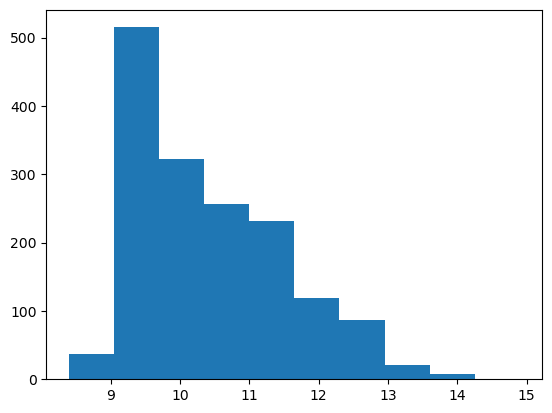

In [64]:
plt.hist(red_Wine_data.alcohol)

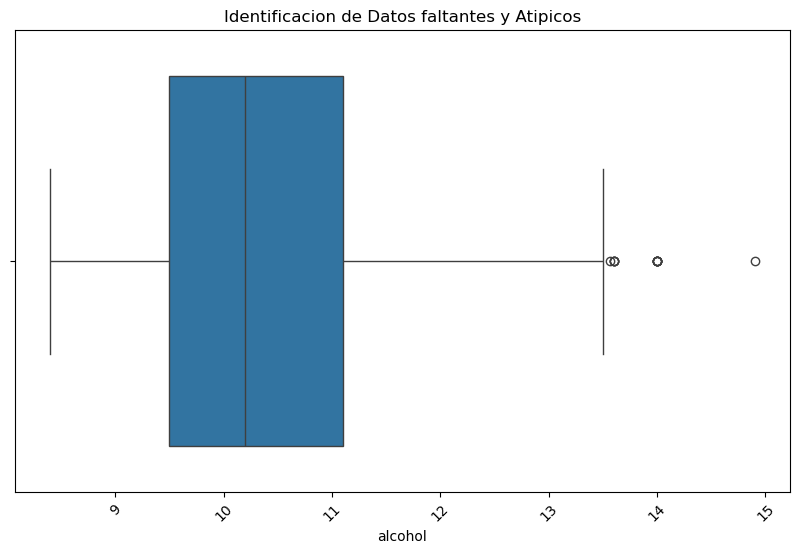

In [91]:
plt.figure(figsize=(10,6))
sns.boxplot(x=red_Wine_data['alcohol'])
plt.xticks(rotation=45)
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=12)
plt.show()

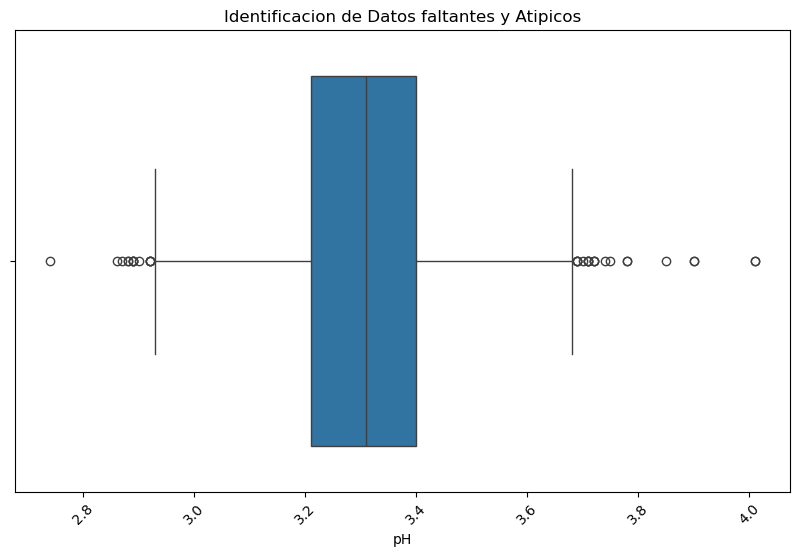

In [98]:
plt.figure(figsize=(10,6))
sns.boxplot(x=red_Wine_data['pH'])
plt.xticks(rotation=45)
plt.title('Identificacion de Datos faltantes y Atipicos', fontsize=12)
plt.show()

In [176]:
predictors_col = ['pH', 'alcohol', 'density', 'sulphates' ]
target_col = ['quality']

In [178]:
predictors = red_Wine_data[predictors_col]
target = red_Wine_data[target_col]

In [180]:
predictors

,pH,alcohol,density,sulphates
0,3.51,9.4,0.99780,0.56
1,3.20,9.8,0.99680,0.68
2,3.26,9.8,0.99700,0.65
3,3.16,9.8,0.99800,0.58
4,3.51,9.4,0.99780,0.56
...,...,...,...,...
1594,3.45,10.5,0.99490,0.58
1595,3.52,11.2,0.99512,0.76
1596,3.42,11.0,0.99574,0.75
1597,3.57,10.2,0.99547,0.71


In [182]:
corr = predictors.corr()
corr

,pH,alcohol,density,sulphates
pH,1.000000,0.205633,-0.341699,-0.196648
alcohol,0.205633,1.000000,-0.496180,0.093595
density,-0.341699,-0.496180,1.000000,0.148506
sulphates,-0.196648,0.093595,0.148506,1.000000


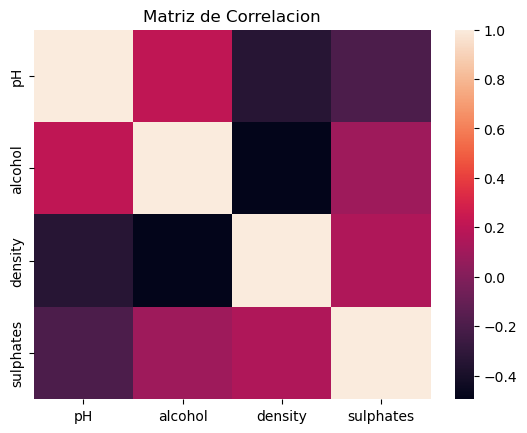

In [184]:
sns.heatmap(corr)
plt.title('Matriz de Correlacion')
plt.show()

In [186]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [188]:
tree = DecisionTreeClassifier()

In [190]:
arbol = tree.fit(x_train, y_train)

[Text(0.5348975943091593, 0.9791666666666666, 'x[1] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9.0, 45.0, 535.0, 514.0, 164.0, 12.0]'),
 Text(0.21692412528967064, 0.9375, 'x[3] <= 0.535\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.37591085979941496, 0.9583333333333333, 'True  '),
 Text(0.04452380047866884, 0.8958333333333334, 'x[1] <= 9.533\ngini = 0.367\nsamples = 183\nvalue = [2, 13, 143, 24, 1, 0]'),
 Text(0.01641150324811002, 0.8541666666666666, 'x[1] <= 9.075\ngini = 0.206\nsamples = 89\nvalue = [0, 5, 79, 5, 0, 0]'),
 Text(0.004862667629069635, 0.8125, 'x[0] <= 3.19\ngini = 0.611\nsamples = 6\nvalue = [0, 2, 3, 1, 0, 0]'),
 Text(0.0024313338145348176, 0.7708333333333334, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0]'),
 Text(0.007294001443604452, 0.7708333333333334, 'x[2] <= 0.998\ngini = 0.625\nsamples = 4\nvalue = [0, 2, 1, 1, 0, 0]'),
 Text(0.004862667629069635, 0.7291666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'

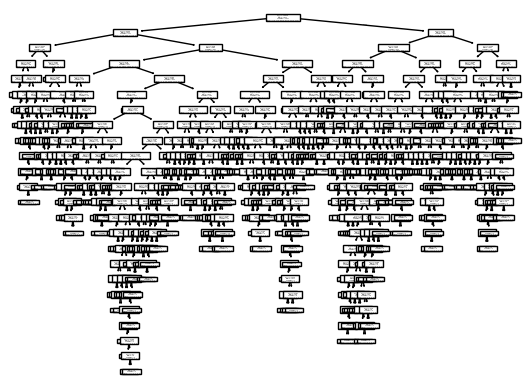

In [193]:
plot_tree(arbol)